



# <font color='Blue'> ***Text Mining Analysis on Cyberbullying Tweets*** </font>


## <font color='grey'>**In this project, we work with a dataset of tweets labeled as containing hate speech or not. The function load_prepare_data() is used to load and prepare the data for analysis and modeling** </font>




![Stop Ciberbullying](https://www.naquera.es/sites/www.naquera.es/files/img/noticias/foto_714.jpg)
---
---
---

####One of the most pressing issues on the internet today is the prevalence of negative attitudes toward various groups based on ethnicity, gender, religion, or political ideology. This study focuses on identifying and analyzing the presence of hate speech in tweets. The dataset used for this analysis contains manually labeled tweets sourced from the Kaggle platform.

[Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data).

####Originally, each tweet in the dataset was assigned to one of the following categories:

- Religion
- Age
- Ethnicity
- Gender
- Other Cyberbullying
- Not Cyberbullying

####The dataset’s primary objective was to train models to detect different types of hate speech targeting specific groups. However, for the purposes of this analysis, the labels have been simplified into binary categories (1 or 0), indicating whether the tweet contains hate speech.

####Objective:

####The main objective of this study is to develop and train classification models capable of accurately categorizing tweets as either containing hate speech or not. To achieve this, various stages of data exploration, preprocessing, and text vectorization will be applied. The study will also involve the training and evaluation of multiple machine learning models.

####Approach

1. **Exploratory Data Analysis (EDA)**

The initial phase involves an exploratory analysis of the dataset. This includes:

- Assessing the number of documents (tweets),

- Visualizing distributions of tweet lengths,

- Generating word clouds, and

- Conducting additional exploratory analyses to gain insights into the data.

#### This step is crucial to understand the structure and content of the data. We will also include text normalization techniques to clean and preprocess the data. These techniques include:

- Removing stop words,

- Eliminating punctuation, and

- Lemmatization or stemming to reduce words to their base form.

2. **Text Vectorization**

To convert the tweets into a machine-readable format, various text vectorization strategies will be applied. These include:

- TF-IDF (Term Frequency-Inverse Document Frequency) to capture the importance of words relative to the entire corpus,

- Word Embeddings for capturing semantic relationships between words.

- Additional features, such as sentiment analysis or lexical features, may be incorporated to enhance the model’s ability to detect hate speech.

3. **Model Training and Validation**

The final phase involves training and evaluating multiple classification models to identify the best-performing algorithm. At least three different machine learning classifiers will be tested. After evaluating their general performance, hyperparameter tuning will be performed to optimize the best model. The following metrics will be used for evaluation:

- Accuracy,
- Precision,
- Recall,
- F1-score, and
- ROC-AUC.

The goal is to select the most suitable model that can accurately detect hate speech in tweets, providing valuable insights into the nature of cyberbullying on social media platforms.

In [ ]:
import pandas as pd
def load_prepare_data(path):
  """
  Función para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



## <font color='Blue'> **Import necessary libraries** </font>

In [ ]:
# Import necessary libraries for text mining and machine learning
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import spacy

In [ ]:
import tensorflow as tf

gpu_available = tf.config.list_physical_devices('GPU')
print(f"GPU disponible: {bool(gpu_available)}")

GPU disponible: True


In [ ]:
from tensorflow.python.client import device_lib

def get_gpu_details():
    local_device_protos = device_lib.list_local_devices()
    gpu_details = [x.physical_device_desc for x in local_device_protos if x.device_type == 'GPU']
    return gpu_details

gpu_details = get_gpu_details()
if gpu_details:
    print(f"Detalles de la GPU:\n{gpu_details[0]}")
else:
    print("No se encontró ninguna GPU.")

Detalles de la GPU:
device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


## <font color='Blue'> **Obtaining the corpus** </font>


- To obtain the data you have available the function load_prepare_data(). This function prepares the data of the exercise in Pandas dataframe format so that you can carry it out

In [ ]:
# Load the dataset
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
dataset = load_prepare_data(path_data)

# Alternative data path in case the previous one doesn't work (being hosted on github there may be download limitations.
# path_data = "https://zenodo.org/records/10938455/files/cyberbullying_tweets.csv?download=1"
# dataset = load_prepare_data(path_data)

In [ ]:
dataset.head(10)

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",0
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,0
7,Karma. I hope it bites Kat on the butt. She is...,0
8,@stockputout everything but mostly my priest,0
9,Rebecca Black Drops Out of School Due to Bully...,0



# <font color='blue'> **Exploratory Data Analysis (EDA)** </font>


In [ ]:
# Display the first rows of the dataset
print(dataset.head(20))

                                           tweet_text  cyberbullying
0   In other words #katandandre, your food was cra...              0
1   Why is #aussietv so white? #MKR #theblock #ImA...              0
2   @XochitlSuckkks a classy whore? Or more red ve...              0
3   @Jason_Gio meh. :P  thanks for the heads up, b...              0
4   @RudhoeEnglish This is an ISIS account pretend...              0
5   @Raja5aab @Quickieleaks Yes, the test of god i...              0
6   Itu sekolah ya bukan tempat bully! Ga jauh kay...              0
7   Karma. I hope it bites Kat on the butt. She is...              0
8        @stockputout everything but mostly my priest              0
9   Rebecca Black Drops Out of School Due to Bully...              0
10               @Jord_Is_Dead http://t.co/UsQInYW5Gn              0
11   The Bully flushes on KD http://twitvid.com/A2TNP              0
12                                        Ughhhh #MKR              0
13  RT @Kurdsnews: Turkish state h

In [ ]:
# Number of documents
num_documents = len(dataset)
print(f'Número de documentos: {num_documents}')

Número de documentos: 47692


In [ ]:
# General information on the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_text     47692 non-null  object
 1   cyberbullying  47692 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 745.3+ KB
None


In [ ]:
# Statistical description
print(dataset.describe())

       cyberbullying
count   47692.000000
mean        0.833410
std         0.372613
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000



### <font color='soft'> ***Text Length Distribution*** </font>


In [ ]:
import plotly.express as px

# Distribution of text lengths
dataset['text_length'] = dataset['tweet_text'].apply(len)
fig = px.histogram(dataset, x='text_length', nbins=50, title='Distribution of Tweet Lengths')
fig.update_layout(
    xaxis_title='Length of Tweets',
    yaxis_title='Number of Tweets',
    template='plotly_white'
)
fig.show()

## <font color='softblue'> ***Wordclouds para Tweets de Cyberbullying*** </font>


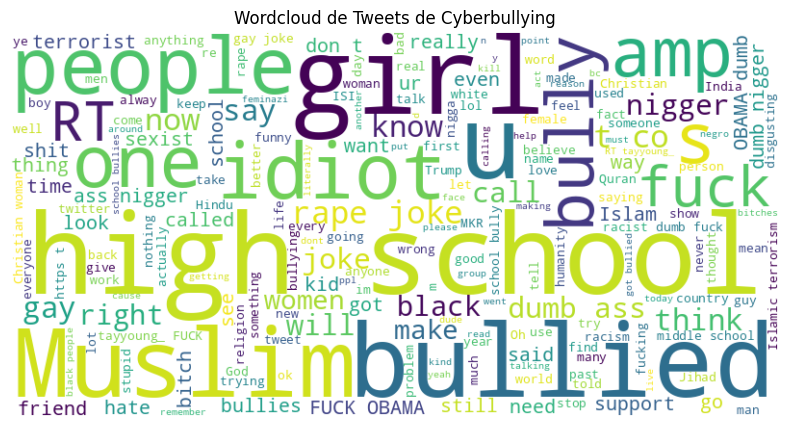

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wordcloud, tweets with cyberbullying content
cyberbullying_words = ' '.join(dataset[dataset['cyberbullying'] == 1]['tweet_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cyberbullying_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud de Tweets de Cyberbullying')
plt.show()

### **Muslim, bullied, girl, idiot, indicate frequency of racism, mistreatment, misogyny, and hatred regarding religious, gender and political issues, in a certain age group and school social environment. Presence of cyberbullying in the topics..**

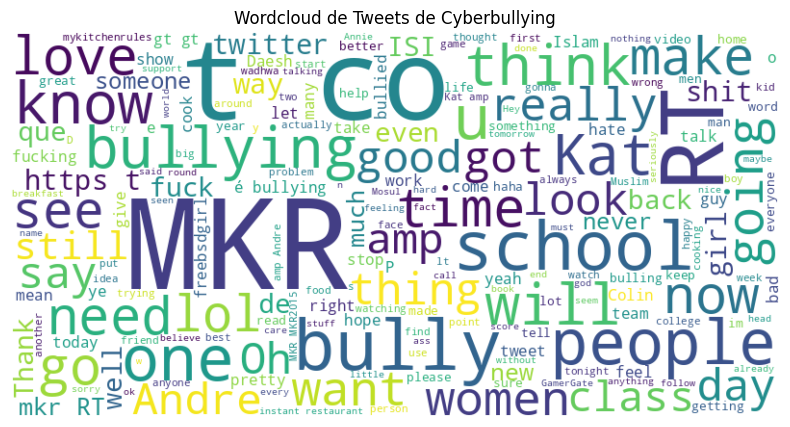

In [ ]:
# Wordcloud, tweets without cyberbullying content
cyberbullying_words = ' '.join(dataset[dataset['cyberbullying'] == 0]['tweet_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cyberbullying_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud de Tweets de Cyberbullying')
plt.show()

### **The word MKR can be observed, it refers to 'Magic Knight Rayearth' which is a Japanese manga series. bully and bullying also appear, it could indicate frequency of cyberbullying regarding this particular 'MKR' topic or not, explicitly or implicitly. They may refer to a school setting of a certain age group.**




In [ ]:
# Show examples of tweets with 'cyberbullying' equals 1
print("Ejemplos de tweets sin contenido de ciberacoso (cyberbullying = 0):")
print(dataset[dataset['cyberbullying'] == 1]['tweet_text'].head(10))


Ejemplos de tweets sin contenido de ciberacoso (cyberbullying = 0):
7945    rape is real..zvasiyana nema jokes about being...
7946    You never saw any celebrity say anything like ...
7947    @ManhattaKnight I mean he's gay, but he uses g...
7948    RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...
7949    Rape is rape. And the fact that I read one pos...
7950    @coiny Also, it's hard to take a company serio...
7951    Idgaf if you are gay, lesbian, bisexual, or wh...
7952    #GermanProfessor gives meaning to term FemiNaz...
7953    RT @mcclure111: #DontDateSJWs #ThatWouldBeAVio...
7954    So I call you female I’m basically calling you...
Name: tweet_text, dtype: object


In [ ]:
# Show examples of tweets with 'cyberbullying' equals 0
print("Ejemplos de tweets con contenido de ciberacoso (cyberbullying = 1):")
print(dataset[dataset['cyberbullying'] == 0]['tweet_text'].head(10))

Ejemplos de tweets con contenido de ciberacoso (cyberbullying = 1):
0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @XochitlSuckkks a classy whore? Or more red ve...
3    @Jason_Gio meh. :P  thanks for the heads up, b...
4    @RudhoeEnglish This is an ISIS account pretend...
5    @Raja5aab @Quickieleaks Yes, the test of god i...
6    Itu sekolah ya bukan tempat bully! Ga jauh kay...
7    Karma. I hope it bites Kat on the butt. She is...
8         @stockputout everything but mostly my priest
9    Rebecca Black Drops Out of School Due to Bully...
Name: tweet_text, dtype: object



# <font color='blue'> **Data Preprocessing** </font>


### <font color='soft'> ***Tokenization and Lemmatization with `spaCy`.*** </font>


- We load the pre-trained spaCy model (en_core_web_sm) for performing natural language processing tasks such as tokenization and lemmatization.

- spacy_stopwords holds a list of English stopwords (common words like "the", "is", "in"), which we will later remove from the text.

- We define punctuations to hold a list of punctuation marks, and RE_WHITESPACE is a regular expression to handle multiple whitespace characters in the text.

In [ ]:
import string # for handling punctuation
import re # for regular expressions

# Loading the spaCy Model for Natural Language Processing
nlp = spacy.load("en_core_web_sm")
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stop_words = spacy_stopwords
punctuations = string.punctuation
RE_WHITESPACE = re.compile(r"\s+")

We define a custom tokenizer function using spaCy. This function performs several tasks:

- Converts text to lowercase,
- Removes stopwords, punctuation, and digits,
- Lemmatizes the words (converts words to their base form).

This tokenizer ensures that the text is cleaned and normalized, ready for further processing.

In [ ]:
# Define a custom tokenizer function using spaCy
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [
        word.text.lower().strip() if word.pos_ == 'PRON' or word.lemma_ == '-PRON-' else word.lemma_.lower().strip()
        for word in mytokens if not word.is_stop and not word.is_punct and not word.is_digit
    ]
    return mytokens


### <font color='soft'> ***Applying the Tokenizer to Clean the Dataset.*** </font>

- We apply the spacy_tokenizer function to the 'tweet_text' column in the dataset.
- The resulting cleaned tokens are joined back into a single string and stored in a new column 'cleaned_text'.
- This step ensures that all tweets are preprocessed, cleaned, and tokenized for further analysis.


In [ ]:
# Apply preprocessing to the dataset's text column
dataset['cleaned_text'] = dataset['tweet_text'].apply(lambda x: ' '.join(spacy_tokenizer(x)))


In [ ]:
# Check the first pre-processed texts
print(dataset[['tweet_text', 'cleaned_text']].head(10))

                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   
5  @Raja5aab @Quickieleaks Yes, the test of god i...   
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...   
7  Karma. I hope it bites Kat on the butt. She is...   
8       @stockputout everything but mostly my priest   
9  Rebecca Black Drops Out of School Due to Bully...   

                                        cleaned_text  
0             word katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2    @xochitlsuckkks classy whore red velvet cupcake  
3  @jason_gio meh :p  thank head concerned angry ...  
4  @rudhoeenglish isis account pretend kurdish ac...  
5  @raja5aab @quickieleak yes test god good bad i... 


# <font color='Blue'> **Feature extraction: Vectorization using TF-IDF and Word2Vec embeddings** </font>


### <font color='soft'> ***Text Vectorization Using TF-IDF*** </font>

- We define a TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency) using the TfidfVectorizer class.

- This vectorizer converts text documents into a matrix of TF-IDF features.
We use n-grams (1 to 3 words in sequence) to capture more context and specify the use of the custom spacy_tokenizer.

- The max_features parameter limits the number of features to 1000 to reduce complexity.

- After defining the vectorizer, we fit it to the cleaned text data (documentes) and transform the text into a numeric matrix (tfidf_data) that can be used for model training..



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text

# Correct vectorization using only TF-IDF (scaling removed as per feedback)
tfidf_vect = TfidfVectorizer(lowercase=False, stop_words=None, use_idf=True, smooth_idf=True, norm=None,
                             tokenizer=spacy_tokenizer, token_pattern=None, ngram_range=(1, 3), max_features=1000)

documentes = dataset['cleaned_text'].tolist()

# Fit the TF-IDF vectorizer and transform the documents
tfidf_data = tfidf_vect.fit_transform(documentes)

In [ ]:
tfidf_feature_names = np.array(tfidf_vect.get_feature_names_out())
tfidf_feature_names


array(['', ' mkr', '$', '+', ':p', '=', '@chriswarcraft', '@freebsdgirl',
       '@israeliregime', '@maxblumenthal', '@mt8_9', '@mykitchenrule',
       '@spacekatgal', '@tayyoung', '@tayyoung fuck',
       '@tayyoung fuck obama', '@thequinnspiracy', 'able', 'abortion',
       'absolutely', 'abt', 'abuse', 'accept', 'account', 'act',
       'act like', 'action', 'actual', 'actually', 'add', 'admit',
       'adult', 'af', 'african', 'age', 'agenda', 'ago', 'agree', 'ai',
       'al', 'allah', 'allow', 'amazing', 'america', 'american',
       'americans', 'amp', 'andre', 'angry', 'animal', 'annoying',
       'answer', 'anti', 'anymore', 'apologize', 'apparently',
       'appreciate', 'arab', 'area', 'argue', 'army', 'article', 'ask',
       'ass', 'ass nigger', 'assault', 'asshole', 'assume', 'attack',
       'attention', 'away', 'awesome', 'awful', 'b', 'baby', 'bad',
       'ball', 'ban', 'base', 'basically', 'bc', 'bear', 'beat',
       'beautiful', 'behavior', 'belief', 'believe', 'be

## **Text Vectorization Using CountVectorizer**

- Similarly, we create a CountVectorizer, which converts the text into a document-term matrix based on word frequency.
- Like TF-IDF, we use n-grams (1 to 3) and the custom spacy_tokenizer.
- The vectorized data (count_data) contains word counts for each document.

#### Extracting Feature Names

- We extract the feature names (words or n-grams) generated by both TF-IDF and CountVectorizer.
- These feature names represent the unique tokens (words or sequences) used to represent each document.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer object similar to the TF-IDF one
count_vect = CountVectorizer(lowercase=False, stop_words=None, tokenizer=spacy_tokenizer, token_pattern=None, ngram_range=(1, 3))

# Fit the CountVectorizer to the cleaned text data
count_data = count_vect.fit_transform(documentes)


# Get feature names for both TF-IDF and CountVectorizer
tfidf_feature_names = np.array(tfidf_vect.get_feature_names_out())
count_feature_names = np.array(count_vect.get_feature_names_out())


### <font color='soft'> ***Displaying the Top Words by Frequency and TF-IDF Score*** </font>

- We define a helper function get_top_vect_words() that extracts the top 'n' words (tokens) from a vectorized document based on their frequency or TF-IDF score.
- The show_doc_results() function applies this to display:
- The most frequent tokens using CountVectorizer, and
- The highest TF-IDF scored tokens using the TF-IDF vectorizer.
- These functions allow us to interpret which words or phrases are most important in each document.

Applying the Display Function to the First 5 Documents.

- We apply the show_doc_results() function to the first 5 documents in our dataset, displaying the most frequent tokens and tokens with the highest TF-IDF score.
- This step gives insight into the most important words within each document, providing a deeper understanding of the underlying patterns in the text data.

In [ ]:
# Function to get top 'n' words from a vectorized response
def get_top_vect_words(response, top_n=2, feature_name_array=tfidf_feature_names):
    # Sort non-zero elements by value to get the most frequent words
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_name_array[response.indices[sorted_nzs]]

# Function to display the most frequent words and words with the highest TF-IDF score for a given document
def show_doc_results(doc, top_n):
    # Transform the document using both TF-IDF and CountVectorizer
    responses_tfidf = tfidf_vect.transform([doc])
    responses_count = count_vect.transform([doc])

    # Get the most frequent tokens and tokens with the highest TF-IDF scores
    most_frequent = list(get_top_vect_words(responses_count, top_n, count_feature_names))
    tfidf = list(get_top_vect_words(responses_tfidf, top_n, tfidf_feature_names))

    print("Most Frequent Tokens: {}".format(most_frequent))
    print("Tokens with Highest TF-IDF: {}".format(tfidf))

# Apply the function to the first 5 documents
for i in range(5):
    print(f"Document {i+1}")
    show_doc_results(documentes[i], 10)

Document 1
Most Frequent Tokens: ['word katandandre food', 'word katandandre', 'word', 'mkr', 'katandandre food crapilicious', 'katandandre food', 'katandandre', 'food crapilicious mkr', 'food crapilicious', 'food']
Tokens with Highest TF-IDF: ['food', 'word', 'mkr']
Document 2
Most Frequent Tokens: ['wonderlandten etc', 'wonderlandten', 'aussietv white', 'aussietv white mkr', 'etc', 'imacelebrityau', 'imacelebrityau today', 'imacelebrityau today sunrise', 'mkr', 'mkr theblock']
Tokens with Highest TF-IDF: ['etc', 'today', 'white', 'mkr']
Document 3
Most Frequent Tokens: ['whore red velvet', 'whore red', 'whore', 'velvet cupcake', 'velvet', 'red velvet cupcake', 'red velvet', 'red', 'cupcake', 'classy whore red']
Tokens with Highest TF-IDF: ['red']
Document 4
Most Frequent Tokens: ['twitter', 'concerned', ' thank', ' thank head', ':p', ':p ', ':p  thank', '@jason_gio', '@jason_gio meh', '@jason_gio meh :p']
Tokens with Highest TF-IDF: ['angry', ':p', 'dude', 'head', 'thank', 'twitter',

# <font color='blue'> **Word2Vec Embeddings with Gensim** </font>

#### <font color='soft'> ***In this section, we generate word embeddings using Word2Vec, a popular technique for capturing semantic relationships between words. Word embeddings represent words as dense vectors in a continuous vector space, where semantically similar words are mapped to nearby points.*** </font>


**Library: Gensim**

Gensim is a Python library designed for text processing. It is widely used for tasks such as topic modeling, word vector representation, and text similarity analysis. In this case, we use Gensim to train a Word2Vec model, which will generate embeddings for the preprocessed dataset of tweets.


### <font color='soft'> ***Training the Word2Vec Model*** </font>

**Training a Word2Vec Model:**

We create word embeddings by training a Word2Vec model on the preprocessed tweets (documentes), which have already been tokenized and cleaned.
Each tweet is split into tokens (words), and these tokenized documents are fed into the model.

Parameters:

- vector_size=100: Each word is represented as a vector of 100 dimensions.

- window=5: The model considers a context window of 5 words to the left and right of the target word.

- min_count=1: Ensures all words are included, regardless of how frequently they appear.

- workers=4: Uses 4 CPU cores for parallel processing to speed up the model training.

The output is word_vectors, which contains the trained word embeddings, capturing the **semantic relationships between words**.


### **Generating Document Vectors**

- Function Explanation: This function takes a document (tweet) as input and generates a document-level vector by averaging the word vectors for each word in the document.
- This approach provides a single numeric representation for the entire document, which is essential for further classification tasks.

### **Transforming Documents into Word2Vec Vectors**

- We apply the document_vector() function to each tweet, converting all documents into vectors using the average word embeddings.
- The resulting matrix X_w2v contains the Word2Vec vectors for all the documents in the dataset.
- Handling NaN Values: If any vectors contain NaN values, we replace them with zero vectors using np.nan_to_num(). This ensures the data is clean and usable for model training.


In [ ]:
from gensim.models import Word2Vec

# Training Word2Vec model for embedding representation
word_vectors = Word2Vec([doc.split() for doc in documentes], vector_size=100, window=5, min_count=1, workers=4).wv

# Function to get the average word vector for a document
def document_vector(doc):
    valid_words = [word_vectors[word] for word in doc if word in word_vectors]
    if valid_words:
        return np.mean(valid_words, axis=0)
    else:
        return np.zeros(word_vectors.vector_size)

# Transform documents into Word2Vec vectors
X_w2v = np.array([document_vector(tweet.split()) for tweet in documentes])
X_w2v = np.nan_to_num(X_w2v)

### **Combining TF-IDF and Word2Vec Features**

To improve the performance of our model, we combine two sets of features:

- TF-IDF features: Capture the importance of individual terms within the entire corpus.
- Word2Vec features: Capture the semantic relationships between words.

The two feature sets are horizontally stacked (np.hstack) to create a combined feature matrix X_combined, which represents each document using both sets of features.

### **Adding Additional Features**

Feature Engineering: We add two additional features to capture more structural information about each tweet:

- Word count: The number of words in each tweet.
- Character count: The number of characters in each tweet.

These features provide valuable insights into the length and complexity of the tweets, which can be useful for model differentiation.

In [ ]:
# Combine both TF-IDF and Word2Vec features into the final feature set
X_combined = np.hstack([tfidf_data.toarray(), X_w2v])

# Adding additional features such as word count and sentence length as extra features (correction applied here)
dataset['word_count'] = dataset['cleaned_text'].apply(lambda x: len(x.split()))
dataset['char_count'] = dataset['cleaned_text'].apply(lambda x: len(x))

### **Combining All Features into the Final Feature Set**

- Final Feature Set: We horizontally stack the combined TF-IDF and Word2Vec features (X_combined) with the additional features (word_count and char_count) to create the final feature set X_final.

- This feature matrix will be used for model training and evaluation, providing a comprehensive representation of each document that incorporates lexical, semantic, and structural information.

In [ ]:
# Stack additional features to the combined feature set
additional_features = dataset[['word_count', 'char_count']].values
X_final = np.hstack([X_combined, additional_features])

## Summary

- In this section, we generated word embeddings using Word2Vec, which captures the semantic meaning of words in a continuous vector space. These embeddings were combined with TF-IDF features and additional structural features (such as word and character count) to create a robust feature set for classification tasks. This enriched representation enables the model to understand both the individual importance of words and their broader relationships in context, improving its ability to classify tweets effectively.

- This detailed process will now be used for further model training and evaluation, contributing to the overall goal of detecting hate speech in tweets.

# <font color='blue'> **Segmentation and Tokenization**. </font>

### <font color='soft'> ***In this section, we perform segmentation and tokenization on the text data, followed by the calculation of bigrams and trigrams using textacy, a Python library built on top of spaCy for advanced text analysis. We will also analyze token frequencies and extract key named entities from the tweets using spaCy's visualization tool, displacy.***. </font>

- Textacy Installation: The library textacy provides additional NLP functionalities built on top of spaCy. We install this library to leverage its advanced capabilities, including n-gram extraction, entity recognition, and syntactic dependency parsing.

In [ ]:
!pip install textacy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.2 MB/s eta 0:00:00



## <font color='soft'> **Analyzing a Subset of Tweets Using spaCy and Textacy** </font>

- Processing a Subset of Tweets: We process the first 100 tweets from the dataset using the spaCy NLP model. Each tweet is converted into a Doc object containing tokenized words, sentences, and other linguistic information.
The lista_documentos list stores these processed documents for further analysis.

#### **Sentence Segmentation and Tokenization**

- **Sentence Segmentation**: We break down the fourth tweet into individual sentences using spaCy’s sentence segmentation.

The .sents attribute allows us to identify and extract the individual sentences from the tweet, which is important for understanding sentence structure and meaning.

- **Tokenization:** After segmenting the tweet into sentences, we further tokenize each sentence into individual words (tokens).

This tokenization allows us to examine each word in context, which is necessary for tasks such as sentiment analysis, part-of-speech tagging, or entity recognition.

#### **Calculating Bigrams, Trigrams, and 4-Grams Using Textacy**

- **N-Gram Calculation:**

Using textacy.extract.ngrams, we extract bigrams (two consecutive words), trigrams (three consecutive words), and 4-grams from the fourth tweet.
This step provides insights into common word pairings or sequences that frequently occur together, revealing potential patterns or relationships in the text.

- **Parameters:**

min_freq=1: Includes all n-grams that appear at least once.
filter_stops=False: Does not filter out stop words (common words like "and", "the").

filter_punct=False: Does not remove punctuation.

In [ ]:
import textacy
from collections import Counter
import plotly.express as px
from spacy import displacy

# Analyze a subset of tweets using spaCy and textacy
# We process only the first 100 tweets for demonstration purposes
lista_documentos = [nlp(tweet) for tweet in dataset['tweet_text'][:100]]

# Sentence segmentation and token analysis for a specific tweet (Tweet 4)
# This section breaks down the tweet into individual sentences and tokens
for num, sentence in enumerate(lista_documentos[4].sents):
    print(f'The sentence number {num} is: \n {sentence}')

# Tokenize each sentence from tweet 4 and count the number of tokens per sentence
for num, sentence in enumerate(lista_documentos[4].sents):
    print(f'Sentence {num} has {len(sentence)} tokens')
    tokens = [word for word in sentence]
    print(tokens)

# Calculation of bigrams, trigrams, and 4-grams using textacy
# This provides insight into common word pairings and groupings
print("Bigrams: ", list(textacy.extract.ngrams(lista_documentos[4], 2, min_freq=1, filter_stops=False, filter_punct=False)))
print("Trigrams: ", list(textacy.extract.ngrams(lista_documentos[4], 3, min_freq=1, filter_stops=False, filter_punct=False)))
print("4-grams: ", list(textacy.extract.ngrams(lista_documentos[4], 4, min_freq=1, filter_stops=False, filter_punct=False)))


The sentence number 0 is: 
 @RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  
The sentence number 1 is: 
 Like Islam, it is all lies.
Sentence 0 has 14 tokens
[@RudhoeEnglish, This, is, an, ISIS, account, pretending, to, be, a, Kurdish, account, .,  ]
Sentence 1 has 8 tokens
[Like, Islam, ,, it, is, all, lies, .]
Bigrams:  [@RudhoeEnglish This, This is, is an, an ISIS, ISIS account, account pretending, pretending to, to be, be a, a Kurdish, Kurdish account, account., Like Islam, Islam,, , it, it is, is all, all lies, lies.]
Trigrams:  [@RudhoeEnglish This is, This is an, is an ISIS, an ISIS account, ISIS account pretending, account pretending to, pretending to be, to be a, be a Kurdish, a Kurdish account, Kurdish account., Like Islam,, Islam, it, , it is, it is all, is all lies, all lies.]
4-grams:  [@RudhoeEnglish This is an, This is an ISIS, is an ISIS account, an ISIS account pretending, ISIS account pretending to, account pretending to be, pretending to b



---



---



**Estos fragmentos de código calculan los n-gramas (secuencias de 2, 3 y 4 palabras consecutivas) en el cuarto tweet. La función textacy.extract.ngrams se utiliza para esta tarea, con min_freq=1 para incluir todos los n-gramas que aparecen al menos una vez.**

# <font color='soft'> **Token frequency analysis** </font>

### <font color='soft'> ***Token Frequency Calculation:*** </font>

- We define a helper function token_frequency() to calculate the frequency of each token (word) in the document set.
- This function creates a dictionary that tracks how often each token appears, which is crucial for identifying the most common or important words.


#### **Token Extraction:**

- We extract the lemmatized forms of tokens from all documents, ignoring stop words and punctuation.

- Lemmatization reduces words to their base forms (e.g., "running" to "run"), allowing us to group different word forms together.


#### **Frequency Calculation:**

- We compute the frequency of each token using both a custom function and Python’s Counter class for comparison. This step reveals the most common tokens in the dataset.

#### **Sorting and Validation:**

- We sort the tokens in descending order based on their frequency, then collect the names and frequencies of the tokens that appear more than once.
This ensures that the data is meaningful and ready for visualization.

In [ ]:
# Function to calculate the frequency of tokens across the documents
def token_frequency(lista):
    frequency = {}
    for item in lista:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1
    return frequency

# Extract tokens from all documents and collect them into a list
# We're using lemmatized forms of the tokens and ignoring stopwords and punctuation
lista_tokens = [token.lemma_ for doc in lista_documentos for token in doc if not token.is_stop and not token.is_punct]

# Calculate the frequency of each token
dict_freq = token_frequency(lista_tokens)
dict_freq2 = Counter(lista_tokens)  # Using Counter for alternative frequency calculation


In [ ]:
%%time
dict_freq2 = Counter(lista_tokens)
dict_freq2["Road"]

CPU times: user 130 µs, sys: 1 µs, total: 131 µs
Wall time: 134 µs


0

In [ ]:
# Sort the dictionary by token frequency in descending order for visualization
dict_freq_order = sorted(dict_freq.items(), key=lambda x: x[1], reverse=True)

# Collect the token names and their frequencies
token_names = [item[0] for item in dict_freq_order if item[1] > 1]
token_freqs = [item[1] for item in dict_freq_order if item[1] > 1]

# Validate that the token data isn't empty before proceeding
print("Token names:", token_names)
print("Token frequencies:", token_freqs)


Token names: ['bully', 'mkr', 'like', ' ', 'know', 'bullying', 'good', 'RT', 'love', 'é', 'hoe', 'bad', 'walk', 'school', 'class', 'round', 'assim', 'que', 'god', 'DE', 'people', 'get', 'girl', 'man', 'go', 'thing', 'bring', 'self', 'bean', 'red', 'meh', 'head', 'angry', 'twitter', 'ISIS', 'account', 'test', 'hope', 'Bully', 'year', 'news', 'de', 'bull', 'to', 'one', 'need', 'wish', 'want', 'happen', 'turn', 'old', 'time', 'u', 'email', 'sexist', 'humble', 'look', 'LGBT', 'fuck', 'hey', 'mean', 'meninas', 'nao', 'en', 'away', 'set', 'sorry', 'big', 'shit', 'tweet', 'fit', 'taste', 'ass', 'oil', 'Tumblr', 'são', 'college', 'SÃO', 'PAULO']
Token frequencies: [14, 12, 11, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



## <font color='soft'> **Visualizing Token Frequencies** </font>


In [ ]:
import plotly.express as px

# This creates a bar plot that shows the frequency distribution of the most common tokens
fig = px.bar(x=token_names, y=token_freqs, labels={'x': 'Tokens', 'y': 'Frequency'}, title='Token Frequency Distribution')
fig.show()



# <font color='blue'> **Named Entity Recognition and Dependency Visualization.** </font>


### <font color='soft'> ***Named Entity Recognition (NER)*** </font>

- We extract named entities (such as people, organizations, locations) from the first five tweets using spaCy’s named entity recognition feature.
- Entities are visualized using displacy, which renders the grammatical structure and entity relationships for each tweet.
- This visualization helps in understanding the underlying grammatical structure and the entities referenced in the text.



In [ ]:
from spacy import displacy

# This step uses spaCy to extract and visualize named entities within the tweets
for tweet in dataset['tweet_text'][:5]:  # Subset of 5 tweets for demonstration
    doc = nlp(tweet)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    if entities:
        print(f"Tweet: {tweet}")
        print(f"Entities: {entities}")
        displacy.render(doc, style='dep', jupyter=True)
    else:
        print(f"Tweet: {tweet}")
        print("No named entities found.\n")

Tweet: In other words #katandandre, your food was crapilicious! #mkr
Entities: [('katandandre', 'PERSON')]


Tweet: Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc
Entities: [('#MKR #', 'MONEY'), ('#ImACelebrityAU #', 'MONEY'), ('#studio10 #Neighbours #', 'MONEY')]


Tweet: @XochitlSuckkks a classy whore? Or more red velvet cupcakes?
No named entities found.

Tweet: @Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.
No named entities found.

Tweet: @RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.
Entities: [('ISIS', 'ORG'), ('Kurdish', 'NORP'), ('Islam', 'ORG')]


## **Visualization of Named Entities**

- Named Entity Visualization: We use displacy to visually represent the named entities for the first 10 tweets.
- This section highlights entities such as people, organizations, and locations within the text, offering a visual summary of the most important elements in each tweet.

In [ ]:
# Visualization of named entities for the first 10 tweets using spaCy's rendering engine
# This section highlights named entities such as people, organizations, and locations in the tweets
for tweet in dataset['tweet_text'][:10]:  # Subset of 10 tweets for demonstration
    doc = nlp(tweet)
    displacy.render(doc, style='ent', jupyter=True)  # Visualize entities
    print([(ent.text, ent.label_) for ent in doc.ents])

[('katandandre', 'PERSON')]


[('#MKR #', 'MONEY'), ('#ImACelebrityAU #', 'MONEY'), ('#studio10 #Neighbours #', 'MONEY')]


/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



[]


[]


[('ISIS', 'ORG'), ('Kurdish', 'NORP'), ('Islam', 'ORG')]


[('@Raja5aab', 'PERSON')]


[('Itu', 'ORG'), ('tempat', 'CARDINAL'), ('jauh kaya', 'PERSON')]


[('Kat', 'PERSON')]


[]


[('Rebecca Black Drops', 'PERSON')]




---



---

 ## <font color='soft'> **Summary:** </font>


In this section:

- Segmented and tokenized tweets using spaCy.
- Extracted bigrams, trigrams, and 4-grams using textacy.
- Performed a detailed token frequency analysis and visualized the most common tokens using Plotly.
- Used Named Entity Recognition (NER) to extract and visualize entities within the tweets, providing insights into the key elements mentioned in the text.

# <font color='green'> **Training and comparing models for cyberbullying detection.** </font>

## **Model Training and Evaluation**

- Train and evaluate multiple classification models to detect cyberbullying in tweets. By employing different machine learning algorithms, we aim to find the model that best balances precision, recall, and overall accuracy. The evaluation of each model includes hyperparameter optimization and performance analysis using key metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

## **Encoding Labels for Classification**

- Label Encoding: The target labels for classification are extracted from the dataset's 'cyberbullying' column, where tweets are labeled as either containing hate speech (1) or not (0). This column will be used as the ground truth for training our machine learning models.



In [ ]:
# Encode labels for classification
y = dataset['cyberbullying']

#### **Data Splitting**: The dataset is split into training and testing sets using an 80/20 ratio. The training set will be used to build and optimize the model, while the testing set will be held back to evaluate the model's performance on unseen data.

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=21)



## <font color='softblue'> ***Handling Class Imbalance with SMOTE. (Synthetic Minority Over-sampling Technique). imblearn*** </font>

- SMOTE (Synthetic Minority Over-sampling Technique): Given the imbalanced nature of the dataset (where non-cyberbullying tweets far outnumber cyberbullying tweets), we apply SMOTE to rebalance the training set.

- SMOTE generates synthetic samples for the minority class (cyberbullying tweets) to ensure that the model is trained on a more balanced dataset, preventing it from being biased toward the majority class.

- X_res, y_res: The resampled training set after applying SMOTE.


In [ ]:
# SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=21)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
# Verify the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("Class distribution after SMOTE:")
print(pd.Series(y_res).value_counts())

Distribución de clases antes del rebalanceo:
cyberbullying
1    31785
0     6368
Name: count, dtype: int64
Distribución de clases después del rebalanceo:
cyberbullying
1    31785
0    31785
Name: count, dtype: int64



# <font color='green'> **Model Training and Hyperparameter Optimization:** </font>

## <font color='soft'> ***Logistic Regression*** </font>

- Model Selection: Logistic Regression is a linear classifier commonly used for binary classification tasks. It models the relationship between the input features and the target labels using a logistic function.

In [ ]:
# Logistic Regression with GridSearchCV
model_lr = LogisticRegression(max_iter=1000)
param_grid_lr = {
    'C': [0.01],
    'solver': ["liblinear"]
}

grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_res, y_res)

# Best Logistic Regression model and evaluation
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

print("Best Hyperparameters (Logistic Regression):", grid_search_lr.best_params_)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("ROC AUC (Logistic Regression):", roc_auc_score(y_test, best_model_lr.predict_proba(X_test)[:, 1]))



Best Hyperparameters (Logistic Regression): {'C': 0.01, 'solver': 'liblinear'}
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.47      0.84      0.60      1577
           1       0.96      0.81      0.88      7962

    accuracy                           0.81      9539
   macro avg       0.71      0.82      0.74      9539
weighted avg       0.88      0.81      0.83      9539

Accuracy (Logistic Regression): 0.8147604570709718
ROC AUC (Logistic Regression): 0.9082206747109007


Performance Metrics:

- Precision: The ability of the model to correctly identify true positives. In this case, class 1 (cyberbullying) has a precision of 0.96, meaning the model is highly accurate in detecting cyberbullying tweets.
- Recall: The ability to capture all actual positives. For class 0 (non-cyberbullying), recall is 0.84, indicating that the model captures most non-cyberbullying tweets.
- F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics.
- ROC AUC: Measures the ability of the model to distinguish between the classes. A value of 0.908 indicates strong performance.

## <font color='soft'> ***BernoulliNB*** </font>

- Model Selection: Bernoulli Naive Bayes is a probabilistic classifier that assumes feature independence and works well for binary/Boolean features, making it suitable for text classification tasks where features are either present or absent.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# BernoulliNB model with GridSearchCV
model_nb = BernoulliNB()
param_grid_nb = {'alpha': [0.01, 0.1, 1.0]}  # Try different values of alpha

grid_search_nb = GridSearchCV(model_nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_res, y_res)

# Best BernoulliNB model and evaluation
best_model_nb = grid_search_nb.best_estimator_
y_pred_nb = best_model_nb.predict(X_test)

print("\nBest Hyperparameters (BernoulliNB):", grid_search_nb.best_params_)
print("Classification Report (BernoulliNB):\n", classification_report(y_test, y_pred_nb))
print("Accuracy (BernoulliNB):", accuracy_score(y_test, y_pred_nb))
print("ROC AUC (BernoulliNB):", roc_auc_score(y_test, best_model_nb.predict_proba(X_test)[:, 1]))



Best Hyperparameters (BernoulliNB): {'alpha': 0.01}
Classification Report (BernoulliNB):
               precision    recall  f1-score   support

           0       0.44      0.78      0.56      1577
           1       0.95      0.80      0.87      7962

    accuracy                           0.80      9539
   macro avg       0.69      0.79      0.72      9539
weighted avg       0.86      0.80      0.82      9539

Accuracy (BernoulliNB): 0.7991403711080826
ROC AUC (BernoulliNB): 0.883490333045186


## <font color='soft'> ***Random Forest*** </font>

Model Selection: Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to improve classification performance.

Hyperparameter Tuning:

- max_depth = 30: The maximum depth of the individual trees.
- max_features = 'sqrt': The number of features to consider when looking for the best split.
- n_estimators = 150: The number of trees in the forest.

In [ ]:
# Random Forest model with GridSearchCV
model_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_res, y_res)

# Best Random Forest model and evaluation
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

print("\nBest Hyperparameters (Random Forest):", grid_search_rf.best_params_)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("ROC AUC (Random Forest):", roc_auc_score(y_test, best_model_rf.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast




Best Hyperparameters (Random Forest): {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 150}
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.46      0.69      0.55      1577
           1       0.93      0.84      0.88      7962

    accuracy                           0.82      9539
   macro avg       0.70      0.77      0.72      9539
weighted avg       0.85      0.82      0.83      9539

Accuracy (Random Forest): 0.8155991194045498
ROC AUC (Random Forest): 0.8797662788543616


## <font color='Blue'> **Comparative Analysis of Classification Models for Cyberbullying Detection** </font>


In this study, we compared three machine learning models for the task of detecting cyberbullying in tweets:

- Logistic Regression: Achieved the best performance, with a high AUC score (0.908) and excellent precision (0.96) for detecting cyberbullying.

- Bernoulli Naive Bayes: Performed well but was slightly less effective than Logistic Regression, with an AUC of 0.883.

- Random Forest: Showed good performance, with a high recall for non-cyberbullying tweets and an AUC of 0.879, making it a robust choice for imbalanced data.

Each model has strengths depending on the use case. Logistic Regression and Random Forest performed best overall, particularly when precision and recall are critical. Based on the evaluation metrics, Logistic Regression appears to be the most effective model for this dataset